In [353]:
import os
import sys
import matplotlib.pyplot as plt
import random
import torch
import torch.utils.data as data
import torch.nn as nn
import numpy as np
import pandas as pd

if os.path.abspath('..') not in sys.path:
    sys.path.insert(0, os.path.abspath('..'))

if os.path.abspath('../..') not in sys.path:
    sys.path.insert(0, os.path.abspath('../..'))
from Evaluate.evaluate import *

from utils.processing import crop
from utils.heatmap_generator import HeatmapGenerator
from NetworkTrainer.network_trainer import *
from DataLoader.dataloader_IVDsegmentation import landmark_extractor


In [354]:
MRfile_path = 'G:/SpineSegmentation/Spine_Segmentation/Spine_Segmentation/Case5/MR.nii.gz'
MR = sitk.ReadImage(MRfile_path , sitk.sitkFloat32)
MR = sitk.GetArrayFromImage(MR)[np.newaxis, :, :, :]
MR = np.clip(MR / 2048, a_min=0, a_max=1)

In [355]:
MR.shape


(1, 12, 256, 256)

In [356]:
landmarkfile_path = 'G:/SpineSegmentation/Spine_Segmentation/Spine_Segmentation/Case5/landmarks.csv'
landmarks = pd.read_csv(landmarkfile_path)
landmarks = landmark_extractor(landmarks)
list_landmarks = landmarks


In [357]:
_,D, H, W = MR.shape
heatmap_generator = HeatmapGenerator(image_size=(D, H, W),
                                         sigma=2.,
                                         scale_factor=1.,
                                         normalize=True,
                                         size_sigma_factor=8,
                                         sigma_scale_factor=2,
                                         dtype=np.float32)

In [358]:
#for index, landmark in enumerate(list_IVD_landmarks):
    #index
    #pred_Mask += np.where(Mask == index + 2 , 1, 0)
temp = torch.zeros(1, 12, 256, 256)
index = random.randint(0, 18)
while True in np.isnan(list_landmarks[index]):
    index = random.randint(0, 18)
heatmap = torch.from_numpy(heatmap_generator.generate_heatmap(landmark=list_landmarks[index - 2])[np.newaxis, :, :, :])

In [359]:
heatmap1 = torch.from_numpy(heatmap_generator.generate_heatmap(landmark=list_landmarks[index - 1])[np.newaxis, :, :, :])
heatmap2 = torch.from_numpy(heatmap_generator.generate_heatmap(landmark=list_landmarks[index])[np.newaxis, :, :, :])
heatmap3 = torch.from_numpy(heatmap_generator.generate_heatmap(landmark=list_landmarks[index + 1])[np.newaxis, :, :, :])
heatmap4 = torch.from_numpy(heatmap_generator.generate_heatmap(landmark=list_landmarks[index + 2])[np.newaxis, :, :, :])

preheatmap = torch.cat((temp,heatmap), dim=0)
preheatmap = torch.cat((preheatmap,heatmap1), dim=0)
preheatmap = torch.cat((preheatmap,heatmap2), dim=0)
preheatmap = torch.cat((preheatmap,heatmap3), dim=0)
preheatmap = torch.cat((preheatmap,heatmap4), dim=0)

index

12

In [368]:
pred_heatmap = torch.argmax(preheatmap, dim = 0)
pred_heatmap.shape

torch.Size([12, 256, 256])

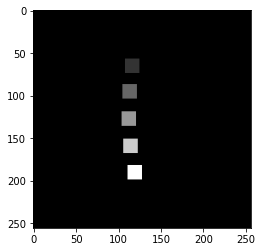

In [369]:
torch.where(pred_heatmap > 0, pred_heatmap + 10, pred_heatmap)
plt.imshow(pred_heatmap[6], cmap='gray')

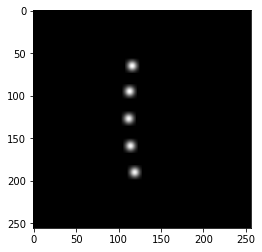

In [362]:
plt.imshow(heatmap[0][6]+ heatmap1[0][6] + heatmap2[0][6] + heatmap3[0][6] + heatmap4[0][6], cmap='gray')


In [363]:
dataset =  [MR, heatmap]
loader = data.DataLoader(dataset=dataset, batch_size=2, shuffle=True, num_workers=4,
                             pin_memory=True)
for batch_idx, case in tqdm(enumerate(loader)):
    input_ = case[0]  # tensor: (batch_size, C, D, H, W)
    target = case[1:]

0it [00:00, ?it/s]


AttributeError: Caught AttributeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "g:\python\lib\site-packages\torch\utils\data\_utils\worker.py", line 287, in _worker_loop
    data = fetcher.fetch(index)
  File "g:\python\lib\site-packages\torch\utils\data\_utils\fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "g:\python\lib\site-packages\torch\utils\data\_utils\collate.py", line 53, in default_collate
    numel = sum([x.numel() for x in batch])
  File "g:\python\lib\site-packages\torch\utils\data\_utils\collate.py", line 53, in <listcomp>
    numel = sum([x.numel() for x in batch])
AttributeError: 'numpy.ndarray' object has no attribute 'numel'


In [ ]:
input_.shape

In [ ]:
target.shape

In [ ]:
loss = nn.L1Loss()

loss(input_,target)
input_ = input_[np.newaxis,:, :, :, :]



